<h1> Vendas de casas em King County, EUA </h1>

#   Tratando o DataFrame

Importando as bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importando os dados

In [ ]:
dados = pd.read_csv('kc_house_data.csv')

Fazendo o primeiro tratamento do DF

Entendendo melhor os dados

Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015.

In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Daqui podemos saber que: <br>
-> Há 21.613 mil linhas.<br>
-> Há 21 colunas.<br>
-> Todos os valores são non-null. <br>
-> Os tipos de dados de cada coluna variam antre: <br>
  - 15 colunas int <br>
  - 5 colunas float <br>
  - 1 coluna object <br>

Selecionando as colunas interessadas

In [ ]:
dados_selec = dados.iloc[:, [0,1,2,3,4,5,6,7,9,10,13,14,15,16]]
dados_selec

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,0,1933,0,98028
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,3,0,2009,0,98103
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,3,0,2014,0,98146
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,3,0,2009,0,98144
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,3,0,2004,0,98027


Ajustando e arredondando valores decimais para int

In [ ]:
dados_selec['date'] = dados_selec['date'].apply(lambda x: x[:-9])
dados_selec['bedrooms'] = dados_selec['bedrooms'].round()
dados_selec['bathrooms'] = dados_selec['bathrooms'].round()
dados_selec['floors'] = dados_selec['floors'].round()
dados_selec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,201410,221900.0,3,1.0,1180,5650,1.0,0,3,0,1955,0,98178
1,6414100192,201412,538000.0,3,2.0,2570,7242,2.0,0,3,400,1951,1991,98125
2,5631500400,201502,180000.0,2,1.0,770,10000,1.0,0,3,0,1933,0,98028
3,2487200875,201412,604000.0,4,3.0,1960,5000,1.0,0,5,910,1965,0,98136
4,1954400510,201502,510000.0,3,2.0,1680,8080,1.0,0,3,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,201405,360000.0,3,2.0,1530,1131,3.0,0,3,0,2009,0,98103
21609,6600060120,201502,400000.0,4,2.0,2310,5813,2.0,0,3,0,2014,0,98146
21610,1523300141,201406,402101.0,2,1.0,1020,1350,2.0,0,3,0,2009,0,98144
21611,291310100,201501,400000.0,3,2.0,1600,2388,2.0,0,3,0,2004,0,98027


In [ ]:
dados_selec.rename({"id":"id", 
                    "date":"data", 
                    "price":"preco", 
                    "bedrooms":"quartos", 
                    "bathrooms":"banheiros", 
                    "sqft_living":"sqft_sala", 
                    "sqft_lot":"sqft_lote", 
                    "floors":"andares",
                    "view":"vista",
                    "condition":"condição",
                    "sqft_basement":"sqft_porao",
                    "yr_built":"ano_construcao",
                    "yr_renovated":"ano_reforma",
                    "zipcode":"cep"}, axis='columns', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dados_selec

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
0,7129300520,201410,221900.0,3,1.0,1180,5650,1.0,0,3,0,1955,0,98178
1,6414100192,201412,538000.0,3,2.0,2570,7242,2.0,0,3,400,1951,1991,98125
2,5631500400,201502,180000.0,2,1.0,770,10000,1.0,0,3,0,1933,0,98028
3,2487200875,201412,604000.0,4,3.0,1960,5000,1.0,0,5,910,1965,0,98136
4,1954400510,201502,510000.0,3,2.0,1680,8080,1.0,0,3,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,201405,360000.0,3,2.0,1530,1131,3.0,0,3,0,2009,0,98103
21609,6600060120,201502,400000.0,4,2.0,2310,5813,2.0,0,3,0,2014,0,98146
21610,1523300141,201406,402101.0,2,1.0,1020,1350,2.0,0,3,0,2009,0,98144
21611,291310100,201501,400000.0,3,2.0,1600,2388,2.0,0,3,0,2004,0,98027


# Períodos com maior número de vendas

<h2> Quais foram os períodos com maior número de vendas? </h2>

In [ ]:
# Vamos ver quantas casas foram vendidas por data
dados_selec['data'].value_counts()

201504    2231
201407    2211
201406    2180
201408    1940
201410    1878
201503    1875
201409    1774
201405    1768
201412    1471
201411    1411
201502    1250
201501     978
201505     646
Name: data, dtype: int64

Vamos criar um dataframe com esses valores para podermos manipular as datas e ver com mais clareza

In [ ]:
periodo = pd.DataFrame(list(zip(dados_selec.data.value_counts().index, 
                                dados_selec.data.value_counts())), 
                            columns=['Datas','N de casas vendidas'], 
                            index=None) 

Agora vamos criar um agrupamento por meses e anos e criar um dataframe com a indicação do mes e ano e a somatoria de quantas casas foram vendidas no mesmo

In [ ]:
grupo_datas = periodo.groupby('Datas') 

Assim conseguimos ver o nº de imóveis vendidos em cada mês do ano.
Podemos notar que os meses onde mais houveram vendas foi entre o mês 4 e 8.

In [ ]:
periodo = grupo_datas[['N de casas vendidas']].sum()
periodo 

,N de casas vendidas
Datas,
201405,1768
201406,2180
201407,2211
201408,1940
201409,1774
201410,1878
201411,1411
201412,1471
201501,978


Visualizando o DF em barras

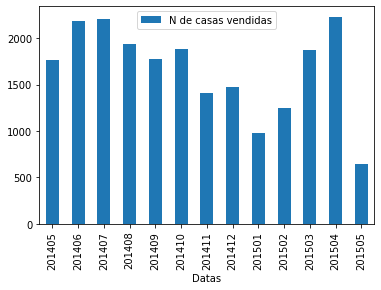

In [ ]:
periodo.plot(kind='bar')

Usando ferramentas estatísticas:

In [ ]:
periodo['N de casas vendidas'].describe()

count      13.000000
mean     1662.538462
std       487.844684
min       646.000000
25%      1411.000000
50%      1774.000000
75%      1940.000000
max      2231.000000
Name: N de casas vendidas, dtype: float64

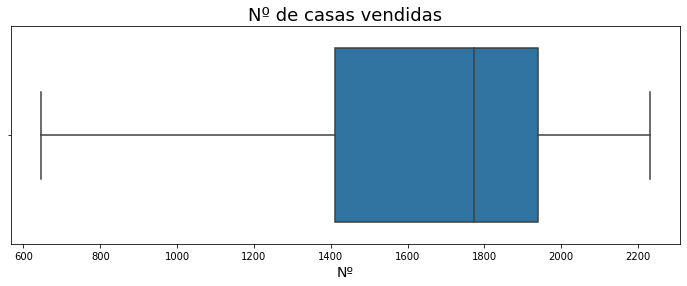

In [ ]:
ax = sns.boxplot(x = 'N de casas vendidas', data = periodo, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Nº de casas vendidas', fontsize=18)
ax.set_xlabel('Nº', fontsize=14)
ax

# Quais regiões venderam mais?

<h2> Quais regiões venderam mais? </h2>



In [ ]:
dados_selec.cep.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: cep, Length: 70, dtype: int64

In [ ]:
regioes = pd.DataFrame(list(zip(dados_selec.cep.value_counts().index, 
                                dados_selec.cep.value_counts())), 
                        columns=['CEP','N_de_casas'], 
                        index=None)

In [ ]:
regioes.head(15)

,CEP,N_de_casas
0,98103,602
1,98038,590
2,98115,583
3,98052,574
4,98117,553
5,98042,548
6,98034,545
7,98118,508
8,98023,499
9,98006,498


In [ ]:
regioes['N_de_casas'].describe()

count     70.000000
mean     308.757143
std      142.267296
min       50.000000
25%      204.500000
50%      282.500000
75%      409.000000
max      602.000000
Name: N_de_casas, dtype: float64

In [ ]:
regioes['N_de_casas'].shape[0]

70

Acima podemos ver que existem 70 códigos postais no DataFrame.

# Vamos estudar um pouco os valores dos imóveis

<h2> Vamos estudar um pouco os valores dos imóveis

Vamos começar a entender como as variaveis se dividem e seus comportamentos

In [ ]:
dados_selec[['preco']].describe().round(2)

,preco
count,21613.00
mean,540088.14
std,367127.20
min,75000.00
25%,321950.00
50%,450000.00
75%,645000.00
max,7700000.00


In [ ]:
dados_selec.preco.quantile([0.2, 0.4, 0.6, 0.8, 0.9])

0.2    298470.0
0.4    399500.0
0.6    519000.0
0.8    700108.0
0.9    887000.0
Name: preco, dtype: float64

In [ ]:
dados_selec.preco.value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: preco, Length: 4028, dtype: int64

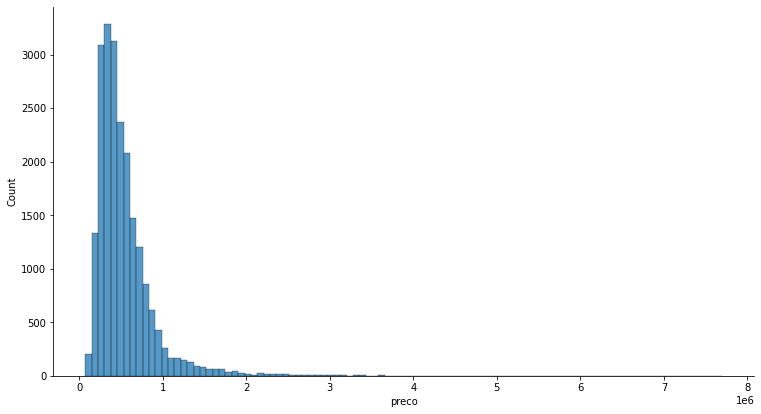

In [ ]:
ax = sns.displot(dados_selec.preco, bins=100)
ax.figure.set_size_inches(12,6)
ax

Acima, podemos observar a **assimetria à esquerda** entre as *Medidas de Tendência Central.*

## Agora vamos caregorizá-las

Agora vamos caregorizá-las e sub dividir todas os 4.028 valores em 7 categorias, respeitando o intervalo de valeores entre os valores das mediatrizes selecionadas acima. E ainda vamos ver qual a mediana dessas mesmas categorias.

### valortab1 - df, shape[0] e .median()

In [ ]:
valortab_1 = dados_selec.query('preco <= 298470.0')
valortab_1.head()

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
0,7129300520,201410,221900.0,3,1.0,1180,5650,1.0,0,3,0,1955,0,98178
2,5631500400,201502,180000.0,2,1.0,770,10000,1.0,0,3,0,1933,0,98028
6,1321400060,201406,257500.0,3,2.0,1715,6819,2.0,0,3,0,1995,0,98003
7,2008000270,201501,291850.0,3,2.0,1060,9711,1.0,0,3,0,1963,0,98198
8,2414600126,201504,229500.0,3,1.0,1780,7470,1.0,0,3,730,1960,0,98146


In [ ]:
valortab_1.shape[0]

4323

In [ ]:
valortab_1.preco.median()

245000.0

### valortab2 - df, shape[0] e .median()

In [ ]:
valortab_2 = dados_selec.query(' 298470.0 < preco <= 399500.0')
valortab_2.head()

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
9,3793500160,201503,323000.0,3,2.0,1890,6560,2.0,0,3,0,2003,0,98038
12,114101516,201405,310000.0,3,1.0,1430,19901,2.0,0,4,0,1927,0,98028
16,1875500060,201407,395000.0,3,2.0,1890,14040,2.0,0,3,0,1994,0,98019
20,6300500875,201405,385000.0,4,2.0,1620,4980,1.0,0,4,760,1947,0,98133
24,3814700200,201411,329000.0,3,2.0,2450,6500,2.0,0,4,0,1985,0,98030


In [ ]:
valortab_2.shape[0]

4325

In [ ]:
valortab_2.preco.median()

345000.0

### valortab3 - df, shape[0] e .median()

In [ ]:
valortab_3 = dados_selec.query('399500.0 < preco <= 519000.0')
valortab_3.head()

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
4,1954400510,201502,510000.0,3,2.0,1680,8080,1.0,0,3,0,1987,0,98074
11,9212900260,201405,468000.0,2,1.0,1160,6000,1.0,0,4,300,1942,0,98115
13,6054650070,201410,400000.0,3,2.0,1370,9680,1.0,0,4,0,1977,0,98074
17,6865200140,201405,485000.0,4,1.0,1600,4300,2.0,0,4,0,1916,0,98103
28,5101402488,201406,438000.0,3,2.0,1520,6380,1.0,0,3,730,1948,0,98115


In [ ]:
valortab_3.shape[0]

4329

In [ ]:
valortab_3.preco.median()

450000.0

### valortab4 - df, shape[0] e .median()

In [ ]:
valortab_4 = dados_selec.query('519000.0 < preco <= 645000.00')
valortab_4.head()

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
1,6414100192,201412,538000.0,3,2.0,2570,7242,2.0,0,3,400,1951,1991,98125
3,2487200875,201412,604000.0,4,3.0,1960,5000,1.0,0,5,910,1965,0,98136
14,1175000570,201503,530000.0,5,2.0,1810,4850,2.0,0,3,0,1900,0,98107
30,8562750320,201411,580500.0,3,2.0,2320,3980,2.0,0,3,0,2003,0,98027
33,7589200193,201411,535000.0,3,1.0,1090,3000,2.0,0,4,0,1929,0,98117


In [ ]:
valortab_4.shape[0]

3263

In [ ]:
valortab_4.preco.median()

572650.0

### valortab5 - df, shape[0] e .median()

In [ ]:
valortab_5 = dados_selec.query('645000.00 < preco <= 700108.0')
valortab_5.head()

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
10,1736800520,201504,662500.0,3,2.0,3560,9796,1.0,0,3,1700,1965,0,98007
15,9297300055,201501,650000.0,4,3.0,2950,5000,2.0,3,3,970,1979,0,98126
27,3303700376,201412,667000.0,3,1.0,1400,1581,2.0,0,5,0,1909,0,98112
32,461000390,201406,687500.0,4,2.0,2330,5000,2.0,0,4,820,1929,0,98117
35,9547205180,201406,696000.0,3,2.0,2300,3060,2.0,0,3,790,1930,2002,98115


In [ ]:
valortab_5.shape[0]

1050

In [ ]:
valortab_5.preco.median()

674000.0

### valortab6 - df, shape[0] e .median()

In [ ]:
valortab_6 = dados_selec.query('700108.0 < preco <= 887000.0')
valortab_6.head()

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
29,1873100390,201503,719000.0,4,2.0,2570,7173,2.0,0,3,0,2005,0,98052
41,7766200013,201408,775000.0,4,2.0,4220,24186,1.0,0,3,1620,1984,0,98166
42,7203220400,201407,861990.0,5,3.0,3595,5639,2.0,0,3,0,2014,0,98053
47,4178300310,201407,785000.0,4,2.0,2290,13416,2.0,0,4,0,1981,0,98007
55,9822700295,201405,885000.0,4,2.0,2830,5000,2.0,0,3,0,1995,0,98105


In [ ]:
valortab_6.shape[0]

2162

In [ ]:
valortab_6.preco.median()

779665.0

### valortab7 - df, shape[0] e .median()

In [ ]:
valortab_7 = dados_selec.query('preco > 887000.0')
valortab_7.head()

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
5,7237550310,201405,1225000.0,4,4.0,5420,101930,1.0,0,3,1530,2001,0,98053
21,2524049179,201408,2000000.0,3,3.0,3050,44867,1.0,4,3,720,1968,0,98040
26,1794500383,201406,937000.0,3,2.0,2450,2691,2.0,0,3,700,1915,0,98119
49,822039084,201503,1350000.0,3,2.0,2753,65005,1.0,2,5,588,1953,0,98070
54,4217401195,201503,920000.0,5,2.0,2730,6000,2.0,0,3,600,1927,0,98105


In [ ]:
valortab_7.shape[0]

2161

In [ ]:
valortab_7.preco.median()

1157200.0

## Valores categorizados

Os valores foram categorizados em 7 grupos:

1.   Imóveis com valor menor ou igual a 298470.0
2.   Imóveis com valor maior que 298470.0 e menor ou igual a 399500.0
3.   Imóveis com valor maior que 399500.0 e menor ou igual a 519000.0
4.   Imóveis com valor maior que 519000.0 e menor ou igual a 645000.0
5.   Imóveis com valor maior que 645000.0 e menor ou igual a 700108.0
6.   Imóveis com valor maior que 700108.0 e menor ou igual a 887000.0
7.   Imóveis com valor maior que 887000.0

## Relacionando valores categorizados com suas métricas

In [ ]:
relac_valores = {'Tamanho' : {'Categoria 1': valortab_1.shape[0], 'Categoria 2': valortab_2.shape[0], 'Categoria 3': valortab_3.shape[0], 'Categoria 4': valortab_4.shape[0], 'Categoria 5': valortab_5.shape[0], 'Categoria 6': valortab_6.shape[0], 'Categoria 7': valortab_7.shape[0]},
                 'Mediana' : {'Categoria 1': valortab_1.preco.median(), 'Categoria 2': valortab_2.preco.median(), 'Categoria 3': valortab_3.preco.median(), 'Categoria 4': valortab_4.preco.median(), 'Categoria 5': valortab_5.preco.median(), 'Categoria 6': valortab_6.preco.median(), 'Categoria 7': valortab_7.preco.median()},
                 'Valor Maximo' : {'Categoria 1': valortab_1.preco.max(), 'Categoria 2': valortab_2.preco.max(), 'Categoria 3': valortab_3.preco.max(), 'Categoria 4': valortab_4.preco.max(), 'Categoria 5': valortab_5.preco.max(), 'Categoria 6': valortab_6.preco.max(), 'Categoria 7': valortab_7.preco.max()},
                 'Valor Minimo' : {'Categoria 1': valortab_1.preco.min(), 'Categoria 2': valortab_2.preco.min(), 'Categoria 3': valortab_3.preco.min(), 'Categoria 4': valortab_4.preco.min(), 'Categoria 5': valortab_5.preco.min(), 'Categoria 6': valortab_6.preco.min(), 'Categoria 7': valortab_7.preco.min()}}
relac_valores = pd.DataFrame(relac_valores)
relac_valores

,Tamanho,Mediana,Valor Maximo,Valor Minimo
Categoria 1,4323,245000.0,298450.0,75000.0
Categoria 2,4325,345000.0,399500.0,298500.0
Categoria 3,4329,450000.0,519000.0,399700.0
Categoria 4,3263,572650.0,645000.0,519500.0
Categoria 5,1050,674000.0,700000.0,645500.0
Categoria 6,2162,779665.0,887000.0,700180.0
Categoria 7,2161,1157200.0,7700000.0,887200.0


# Analizando as casas mais caras

<h3>Quais as características comuns nas casas mais caras?

In [ ]:
valortab_7.describe().round(2)

,id,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
count,2.161000e+03,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00,2161.00
mean,4.245765e+09,1344197.76,4.01,2.97,3566.93,23463.42,1.82,1.02,3.46,605.01,1974.30,219.26,98069.74
std,2.844371e+09,587712.06,0.90,0.97,1138.49,60857.50,0.47,1.45,0.70,658.35,32.39,624.88,54.44
min,3.100016e+07,887200.00,0.00,0.00,1140.00,609.00,1.00,0.00,1.00,0.00,1900.00,0.00,98003.00
25%,1.818800e+09,975000.00,3.00,2.00,2820.00,6349.00,2.00,0.00,3.00,0.00,1952.00,0.00,98027.00
50%,3.629921e+09,1157200.00,4.00,3.00,3450.00,10259.00,2.00,0.00,3.00,500.00,1984.00,0.00,98056.00
75%,6.790830e+09,1485000.00,4.00,4.00,4140.00,17833.00,2.00,2.00,4.00,1050.00,2002.00,0.00,98112.00
max,9.839301e+09,7700000.00,10.00,8.00,13540.00,982998.00,4.00,4.00,5.00,4820.00,2015.00,2015.00,98199.00


As casas mais caras têm em média 4 quartos, 3 banheiros, os lotes têm 1.0259,00 pés quadrados de tamanho, 2 andares, 0 de vista, foram construidos por volta de 2002.

In [ ]:
# Aqui só confirmamos que elas são mais vendidas entre os meses 4 e 8
valortab_7.data.value_counts()

201504    260
201406    241
201407    223
201503    198
201408    193
201410    189
201405    188
201409    148
201412    137
201411    132
201502    104
201501     87
201505     61
Name: data, dtype: int64

In [ ]:
#Aqui vamos selecionar casas que foram vendidas com preços menores e características parecidas para revender :)
qcasas_comp = valortab_4.query('quartos >= 4 and banheiros >= 3 and sqft_lote >= 10259.00 and andares >= 2 and ano_construcao >= 1984 and condição <= 3 and cep >= 98056.00')
qcasas_comp

,id,data,preco,quartos,banheiros,sqft_sala,sqft_lote,andares,vista,condição,sqft_porao,ano_construcao,ano_reforma,cep
293,6073240060,201410,580000.0,4,3.0,3280,11060,2.0,0,3,1010,1986,0,98056
1119,3343900326,201503,552500.0,4,4.0,3710,10400,2.0,0,3,1420,2002,0,98056
1931,5379804150,201502,598800.0,6,4.0,4470,17877,3.0,3,3,1240,2013,0,98188
1938,6114400136,201407,608250.0,4,3.0,3030,21780,2.0,0,3,0,1986,0,98166
2491,8562900520,201406,640000.0,5,4.0,3690,11928,2.0,0,3,1150,2006,0,98074
3204,4136980090,201504,537000.0,4,4.0,4883,26040,2.0,3,3,1024,2006,0,98092
5182,1592000250,201410,623000.0,4,3.0,2300,12633,2.0,0,3,0,1984,0,98074
5412,240000269,201501,530000.0,4,4.0,4060,10800,2.0,0,3,0,2007,0,98188
6265,6600220380,201405,538888.0,5,3.0,2080,13189,2.0,0,3,0,1987,0,98074
9940,9186300060,201409,635000.0,5,3.0,3710,34200,2.0,0,3,1200,1986,0,98074


# A reforma valoriza o imóvel?

In [ ]:
check_com_reforma = dados_selec.query('ano_reforma != 0')
check_com_reforma.preco.median()

600000.0

In [ ]:
check_sem_reforma = dados_selec.query('ano_reforma == 0')
check_sem_reforma.preco.median()

448000.0

In [ ]:
check_sem_reforma.preco.median()

448000.0

In [ ]:
check_com_reforma.preco.median()

600000.0

As casas reformadas são, geralmente, mais valorizadas.